<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OpenAI-gym-Blackjack-v0" data-toc-modified-id="OpenAI-gym-Blackjack-v0-1">OpenAI gym Blackjack-v0</a></span></li><li><span><a href="#Predicción-Monte-Carlo-de-la-función-V" data-toc-modified-id="Predicción-Monte-Carlo-de-la-función-V-2"><em>Predicción Monte Carlo de la función V</em></a></span><ul class="toc-item"><li><span><a href="#1.-Monte-Carlo.-Introducción" data-toc-modified-id="1.-Monte-Carlo.-Introducción-2.1">1. Monte Carlo. Introducción</a></span></li><li><span><a href="#2.-Tareas-de-Predicción-y-Control" data-toc-modified-id="2.-Tareas-de-Predicción-y-Control-2.2">2. Tareas de Predicción y Control</a></span><ul class="toc-item"><li><span><a href="#Algoritmos-de-Predicción:-First-Visit-y-Every-Visit" data-toc-modified-id="Algoritmos-de-Predicción:-First-Visit-y-Every-Visit-2.2.1">Algoritmos de Predicción: <em>First-Visit</em> y <em>Every-Visit</em></a></span></li></ul></li><li><span><a href="#3.-Algoritmo-de-Predicción-Monte-Carlo-para-V" data-toc-modified-id="3.-Algoritmo-de-Predicción-Monte-Carlo-para-V-2.3">3. Algoritmo de Predicción Monte Carlo para V</a></span><ul class="toc-item"><li><span><a href="#Algoritmo:" data-toc-modified-id="Algoritmo:-2.3.1">Algoritmo:</a></span></li></ul></li><li><span><a href="#4.-Implementación" data-toc-modified-id="4.-Implementación-2.4">4. Implementación</a></span><ul class="toc-item"><li><span><a href="#4.1.-El-Agente" data-toc-modified-id="4.1.-El-Agente-2.4.1">4.1. El Agente</a></span></li></ul></li><li><span><a href="#5.-Entrenamiento-(deterministic_policy)" data-toc-modified-id="5.-Entrenamiento-(deterministic_policy)-2.5">5. Entrenamiento (deterministic_policy)</a></span><ul class="toc-item"><li><span><a href="#5.1.-Visualizando-la-función-V-(deterministic_policy)" data-toc-modified-id="5.1.-Visualizando-la-función-V-(deterministic_policy)-2.5.1">5.1. Visualizando la función V (deterministic_policy)</a></span></li><li><span><a href="#5.2.-Análisis-de-resultados" data-toc-modified-id="5.2.-Análisis-de-resultados-2.5.2">5.2. Análisis de resultados</a></span></li></ul></li><li><span><a href="#6.-Entrenamiento-(stochastic_policy)" data-toc-modified-id="6.-Entrenamiento-(stochastic_policy)-2.6">6. Entrenamiento (stochastic_policy)</a></span><ul class="toc-item"><li><span><a href="#6.1.-Visualizando-la-función-V-(stochastic_policy)" data-toc-modified-id="6.1.-Visualizando-la-función-V-(stochastic_policy)-2.6.1">6.1. Visualizando la función V (stochastic_policy)</a></span></li><li><span><a href="#6.2.-Análisis-de-resultados" data-toc-modified-id="6.2.-Análisis-de-resultados-2.6.2">6.2. Análisis de resultados</a></span></li></ul></li></ul></li><li><span><a href="#Predicción-Monte-Carlo-de-la-función-Q" data-toc-modified-id="Predicción-Monte-Carlo-de-la-función-Q-3"><em>Predicción Monte Carlo de la función Q</em></a></span><ul class="toc-item"><li><span><a href="#7.-Algoritmo-de-Predicción-Monte-Carlo-para-Q" data-toc-modified-id="7.-Algoritmo-de-Predicción-Monte-Carlo-para-Q-3.1">7. Algoritmo de Predicción Monte Carlo para Q</a></span><ul class="toc-item"><li><span><a href="#Algoritmo:" data-toc-modified-id="Algoritmo:-3.1.1">Algoritmo:</a></span></li></ul></li><li><span><a href="#8.-Implementación" data-toc-modified-id="8.-Implementación-3.2">8. Implementación</a></span><ul class="toc-item"><li><span><a href="#El-Agente:" data-toc-modified-id="El-Agente:-3.2.1">El Agente:</a></span></li></ul></li><li><span><a href="#9.-Entrenamiento-(stochastic_policy)" data-toc-modified-id="9.-Entrenamiento-(stochastic_policy)-3.3">9. Entrenamiento (stochastic_policy)</a></span></li><li><span><a href="#10.-Análisis-de-Resultados" data-toc-modified-id="10.-Análisis-de-Resultados-3.4">10. Análisis de Resultados</a></span></li></ul></li></ul></div>


## OpenAI gym Blackjack-v0 
## _Predicción Monte Carlo de la función V_
---

### 1. Monte Carlo. Introducción
---
Para resolver un MDP y calcular su función V, podemos emplear métodos de programación dinámica basados en la ecuación de Bellman. Sin embargo, esto plantea ciertos problemas. Por un lado, debemos recorrer todos los estados en cada iteración (lo cual puede ser impracticable cuando el espacio de estados es muy grande o infinito) y, por otro, se trata de un método _model-based_ que requiere el conocimiento de la probabilidad de transición de estado P(s'|s,a).

Para superar estas limitaciones, podemos hacer uso de métodos **Monte Carlo**. Estos son métodos que se basan en el aprendizaje a partir sólo de la **experiencia** y que se pueden aplicar en entornos cuya dinámica no conocemos, es decir, **_model-free_**.

La idea de base de estos métodos es la de promediar los retornos la muestra. Por ello, sólo los aplicaremos en **tareas episódicas**. Una vez finalizado el episodio, se obtienen los retornos con los que se realizan las estimaciones de las funciones de valor. Básicamente lo que se hace es producir una serie de episodios, recopilar sus retornos y promediarlos, de forma que encontremos una solución aproximada para las funciones V y Q a través de muestreo estadístico.

Formalmente, los métodos Monte Carlo lo que hacen es aproximar la **esperanza matemática** de una variable aleatoria mediante **muestreo**, de forma que cuanto mayor sea el tamaño de la muestra (N), mejor será la aproximación.

<br><img src="mc_eq.png"/><br>

Otra característica de los métodos Monte Carlo es que sólo obtendremos un valor para los estados y acciones que agente haya "experimentado"; por ello, si un estado o acción nunca se han visitado en los episodios, desconoceremos su valor.







### 2. Tareas de Predicción y Control
---
Cuando usamos un método de aprendizaje para aprender funciones de valor de una política, hablamos de **tarea de predicción**. En este caso, suministraremos una determinada política **π** al algoritmo y éste tratará de calcular la función de valor **V** o **Q** para dicha política. Estamos evaluando la política dada. 

Por el contrario, en una **tarea de control**, el algoritmo no recibe ninguna política siendo su objetivo determinar la **política óptima** que maximice el retorno. Partiremos de una política aleatoria e intentaremos obtener la política óptima de forma iterativa.

#### Algoritmos de Predicción: _First-Visit_ y _Every-Visit_
Para estimar el valor de V o Q para una política dada, el algoritmo de predicción debe recopilar primeramente suficientes episodios. Puede suceder que en un episodio se visite de nuevo un estado visitado previamente, o que en un determinado estado se vuelva a seleccionar la misma acción (mismo para estado-acción). Los algoritmos **_First-Visit_** sólo tendrán en cuenta para el cálculo del retorno la primera ocurrencia del estado (o el par estado-acción). Los algoritmos **_Every-Visit_** calculan el retorno para cada visita del estado o del par estado-acción y se promedian los retornos calculados a partir del número de visitas.

Ambos métodos garantizan la convergencia a la verdadera función de valor.


### 3. Algoritmo de Predicción Monte Carlo para V
---
El valor de un estado es el **retorno esperado** (suma de todas las recompensas con descuento) a partir de dicho estado. Una forma obvia de estimarlo a partir de la experiencia es, simplemente, promediar los retornos observados después de las visitas a ese estado. A medida que se obsevan más retornos, el valor debería converger al valor esperado.

<br>

#### Algoritmo:

<img src="mc_algo_V.png" width="550"/><br>

El algoritmo anterior recibirá una política π y el número de episodios a generar (_num\_episodes_). También recibe el factor de descuento 𝛾 para calcular el retorno a partir de las recompensas retardadas.

El contador **_N(s)_** mantendrá el número de veces que alcanzamos un determinado estado.

El contador **_return\_sum(s)_** mantendrá por estado la suma de los retornos obtenidos en los diferentes episodios a partir de dicho estado.

La función de valor para cada estado se obtendrá promediando la suma de los retornos por el número de veces que se visita el estado.

La implementación del algoritmo **_Every-Visit_** sería igual a la anterior sin la sentencia _if_ que chequea si el estado actual se visitó previamente


### 4. Implementación
---
Vamos a crear un agente que nos permita determinar la función valor del entorno Blackjack. Recordemos que el estado en este entorno, está definido como una tupla de 3 valores: suma de las cartas del jugador (int), valor de la carta vista del crupier (int), tenencia de un as (bool)


#### 4.1. El Agente
----

In [7]:
from collections import defaultdict
from random import random

class BJAgent():
    def __init__(self, env, gamma=1):
        self._env = env
        self._state = (0, 0, False)
        self._V = defaultdict(float)
    
    @property
    def state(self):
        return self._state
    
    @state.setter
    def state(self, state):
        self._state = state
        
    def deterministic_policy(self):
        """Política simple determinista:
           Se planta cuando la suma es >= 20
        """
        return 1 if self._state[0] < 20 else 0
    
    def stochastic_policy(self):
        """Política estocástica "conservadora":
           Se planta cuando la suma es mayor que 15 con una probabilidad del 90%
        """
        """
        probs = [0.9, 0.1] if self._state[0] > 15 else [0.1, 0.9]
        return np.random.choice(np.arange(2), p=probs)
        """
        p = random()
        return 1 if (self._state[0] < 16 and p < 0.9) or (self._state[0] > 15 and not p < 0.9) else 0
    
    def generate_episode(self, policy):
        """Genera un episodio utilizando la función de política indicada"""
        episode = []
        self._state = self._env.reset()
        done = False
        while not done:
            action = policy()
            next_state, reward, done, _ = self._env.step(action)
            episode.append((self._state, action, reward))
            self.state = next_state
        return episode

    def mc_every_visit_predict_V(self, num_episodes, policy, gamma=1.0):
        """Implementación del algoritmo Monte Carlo Every Visit para la predicción de la función V"""
        N = defaultdict(int)
        return_sum = defaultdict(int)
        
        for i in range(num_episodes):
            episode = self.generate_episode(policy)
            states, actions, rewards = zip(*episode)
            for i,state in enumerate(states):
                N[state] += 1
                return_sum[state] += sum(r*gamma**k for k,r in enumerate(rewards[i:]))
                self._V[state] = return_sum[state]/N[state]
                
        return self._V
    
    def mc_first_visit_predict_V(self, num_episodes, policy, gamma=1.0):
        """Implementación del algoritmo Monte Carlo First Visit para la predicción de la función V"""
        N = defaultdict(int)
        return_sum = defaultdict(int)
        
        for i in range(num_episodes):
            episode = self.generate_episode(policy)
            states, actions, rewards = zip(*episode)
            for i,state in enumerate(states):
                if state not in states[:i]:
                    N[state] += 1
                    return_sum[state] += sum(r*gamma**k for k,r in enumerate(rewards[i:]))
                    self._V[state] = return_sum[state]/N[state]
                
        return self._V


### 5. Entrenamiento (deterministic_policy)
----

In [3]:
import gym

num_episodes = 500000
env = gym.make('Blackjack-v0')
agent = BJAgent(env)

print("Training...")
V = agent.mc_every_visit_predict_V(num_episodes, agent.deterministic_policy)
print("End!")

Training...
End!



#### 5.1. Visualizando la función V (deterministic_policy)
----

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

def plot_blackjack_values(V, angle=-120):
    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)

        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, angle)
        ax.set_zlim(-1, 1);
        return surf

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('Usable Ace')
    surf = get_figure(True, ax)
    fig.colorbar(surf, shrink=0.5, aspect=15)
    plt.show()

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    surf = get_figure(False, ax)
    fig.colorbar(surf, shrink=0.5, aspect=15)
    plt.show()    


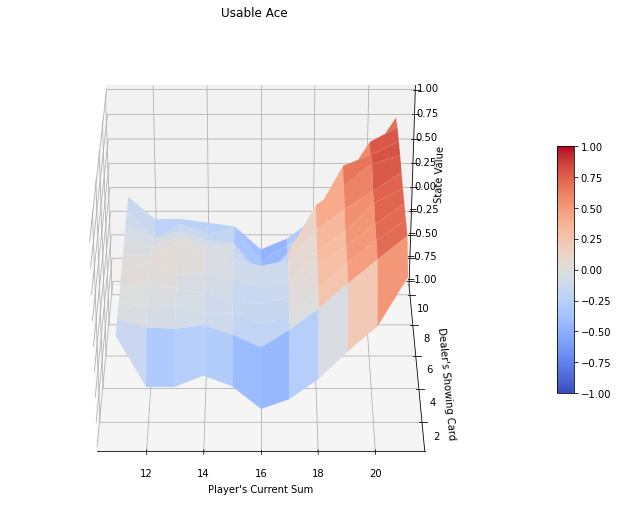

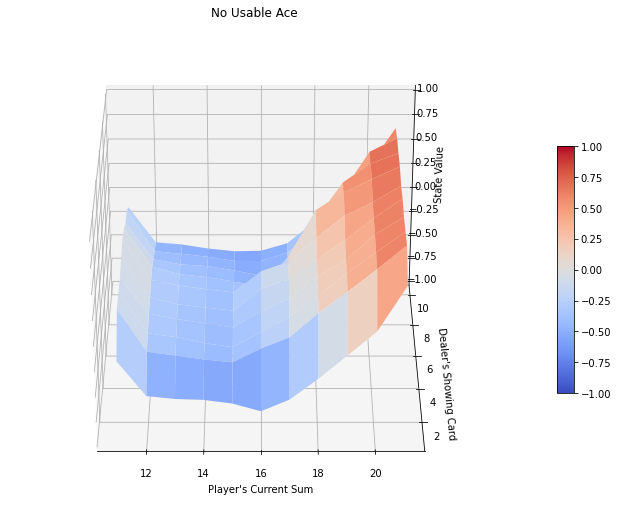

In [11]:
plot_blackjack_values(V, angle=-90)

#### 5.2. Análisis de resultados
---
De las gráficas anteriores podemos extrapolar varios resultados:

- Sólo los estados con suma 20 o 21 presentan un valor alto. Esto es debido a que decidimos plantarnos y, con dicha puntuación, tenemos altas probabilidades de ganar

- A medida que nos acercamos a una suma de 19, dado que seguimos pidiendo cartas, la probabilidad de pasarse aumenta y, por tanto, el valor del estado disminuye

- Para un mismo estado, el disponer de un as hace que su valor sea mayor

- Cuando la carta del crupier es un as, el valor del estado disminuye



### 6. Entrenamiento (stochastic_policy)
----
Vamos a entrenar de nuevo al agente pero utilizando una política diferente. En este caso, usaremos una política más conservadora (se planta por encima de 15) pero, a la vez, estocástica, pues existe un 10% de posibilidades de que seleccione la acción contraria a la preferente para la puntuación actual

In [8]:
import gym

num_episodes = 500000
env = gym.make('Blackjack-v0')
agent = BJAgent(env)

print("Training...")
V = agent.mc_every_visit_predict_V(num_episodes, agent.stochastic_policy)
print("End!")

Training...
End!



#### 6.1. Visualizando la función V (stochastic_policy)
----

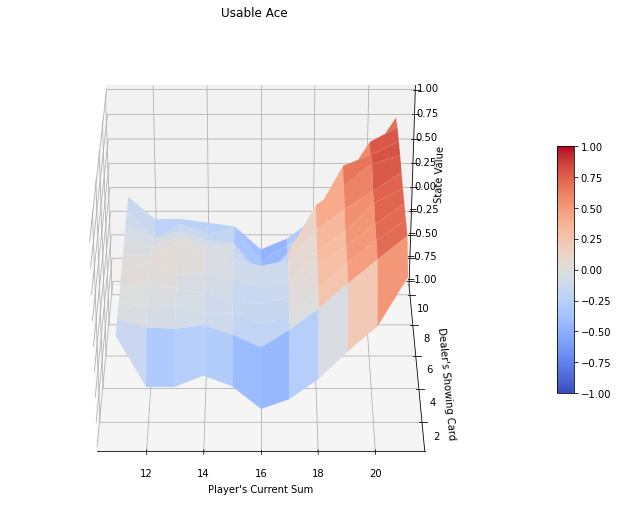

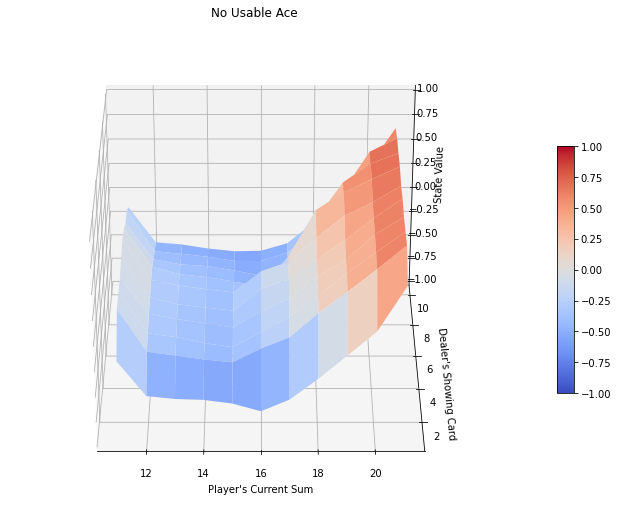

In [13]:
plot_blackjack_values(V, angle=-90)

#### 6.2. Análisis de resultados
---
De las gráficas anteriores podemos extrapolar varios resultados:

- En general, se observan las tendendencias de la política anterior, aunque presentando un mejor comportamiento general



## _Predicción Monte Carlo de la función Q_
---

### 7. Algoritmo de Predicción Monte Carlo para Q
---
Los algoritmos Monte Carlo para esta tarea son esencialmente los mismos presetntados para obtener valores de estado, excepto que ahora hablamos de visitas a un par **estado-acción**, en lugar de a un estado.

<br>

#### Algoritmo:

<img src="mc_algo_Q.png" width="550"/><br>

### 8. Implementación
---
La implementación será muy similar a la de la predicción del valor del estado (V). La principal diferencia es que en las nuevas estructuras de datos, que seguirán siendo diccionarios, los valores correspondientes a cada entrada serán arrays, con un elemento por cada posible acción

<br>

#### El Agente:
Vamos a modificar el agente anterior para añadir la implementación del algoritmo que nos permita predecir el valor de la función Q

In [1]:
import numpy as np
from collections import defaultdict
from random import random

class BJAgent():
    def __init__(self, env, gamma=1):
        self._env = env
        self._state = (0, 0, False)
        self._V = defaultdict(float)
        self._Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    @property
    def state(self):
        return self._state
    
    @state.setter
    def state(self, state):
        self._state = state
        
    def deterministic_policy(self):
        """Política simple determinista:
           Se planta cuando la suma es >= 20
        """
        return 1 if self._state[0] < 20 else 0
    
    def stochastic_policy(self):
        """Política estocástica "conservadora":
           Se planta cuando la suma es mayor que 15 con una probabilidad del 90%
        """
        """
        probs = [0.9, 0.1] if self._state[0] > 15 else [0.1, 0.9]
        return np.random.choice(np.arange(2), p=probs)
        """
        p = random()
        return 1 if (self._state[0] < 16 and p < 0.9) or (self._state[0] > 15 and not p < 0.9) else 0
    
    def generate_episode(self, policy):
        """Genera un episodio utilizando la función de política indicada"""
        episode = []
        self._state = self._env.reset()
        done = False
        while not done:
            action = policy()
            next_state, reward, done, _ = self._env.step(action)
            episode.append((self._state, action, reward))
            self.state = next_state
        return episode

    def mc_every_visit_predict_V(self, num_episodes, policy, gamma=1.0):
        """Implementación del algoritmo Monte Carlo Every Visit para la predicción de la función V"""
        N = defaultdict(int)
        return_sum = defaultdict(int)
        
        for i in range(num_episodes):
            episode = self.generate_episode(policy)
            states, actions, rewards = zip(*episode)
            for i,state in enumerate(states):
                N[state] += 1
                return_sum[state] += sum(r*gamma**k for k,r in enumerate(rewards[i:]))
                self._V[state] = return_sum[state]/N[state]
                
        return self._V
    
    def mc_first_visit_predict_V(self, num_episodes, policy, gamma=1.0):
        """Implementación del algoritmo Monte Carlo First Visit para la predicción de la función V"""
        N = defaultdict(int)
        return_sum = defaultdict(int)
        
        for i in range(num_episodes):
            episode = self.generate_episode(policy)
            states, actions, rewards = zip(*episode)
            for i,state in enumerate(states):
                if state not in states[:i]:
                    N[state] += 1
                    return_sum[state] += sum(r*gamma**k for k,r in enumerate(rewards[i:]))
                    self._V[state] = return_sum[state]/N[state]
                
        return self._V
    
    def mc_every_visit_predict_Q(self, num_episodes, policy, gamma=1.0):
        """Implementación del algoritmo Monte Carlo Every Visit para la predicción de la función Q"""
        N = defaultdict(lambda: np.zeros(self._env.action_space.n))
        return_sum = defaultdict(lambda: np.zeros(self._env.action_space.n))
        
        for i in range(num_episodes):
            episode = self.generate_episode(policy)
            states, actions, rewards = zip(*episode)
            for i,state in enumerate(states):
                action = actions[i]
                N[state][action] += 1
                return_sum[state][action] += sum(r*gamma**k for k,r in enumerate(rewards[i:]))
                self._Q[state][action] = return_sum[state][action]/N[state][action]
                
        return self._Q
    
    def mc_first_visit_predict_Q(self, num_episodes, policy, gamma=1.0):
        """Implementación del algoritmo Monte Carlo First Visit para la predicción de la función Q"""
        N = defaultdict(lambda: np.zeros(self._env.action_space.n))
        return_sum = defaultdict(lambda: np.zeros(self._env.action_space.n))
        
        for i in range(num_episodes):
            episode = self.generate_episode(policy)
            states, actions, rewards = zip(*episode)
            for i,state in enumerate(states):
                if state not in states[:i]:
                    action = actions[i]
                    N[state][action] += 1
                    return_sum[state][action] += sum(r*gamma**k for k,r in enumerate(rewards[i:]))
                    self._Q[state][action] = return_sum[state][action]/N[state][action]
                
        return self._Q


### 9. Entrenamiento (stochastic_policy)
----

In [2]:
import gym

num_episodes = 500000
env = gym.make('Blackjack-v0')
agent = BJAgent(env)

print("Training...")
Q = agent.mc_every_visit_predict_Q(num_episodes, agent.stochastic_policy)
print("End!")

Training...
End!


### 10. Análisis de Resultados
----
Para analizar lo aprendido por el agente, vamos obtener la función V a partir de la función Q, de forma que podamos comparar el nuevo resultado con el anterior.

Recordemos que:

<br>
$$ {\huge V_{\pi}(s) = \sum_{a}\pi(a|s)\cdot Q_{\pi}(s,a)} $$

Según nuestra política estocástica, donde hay un 90% de posibilidades de plantarse si la suma es mayor a 15 o de jugar, si la suma es menor o igual, obtendremos:



In [3]:
V_from_Q = dict((state, (state[0]>15)*(np.dot([0.9, 0.1], actions)) + (state[0]<=15)*(np.dot([0.9, 0.1], actions))) 
               for state, actions in Q.items())

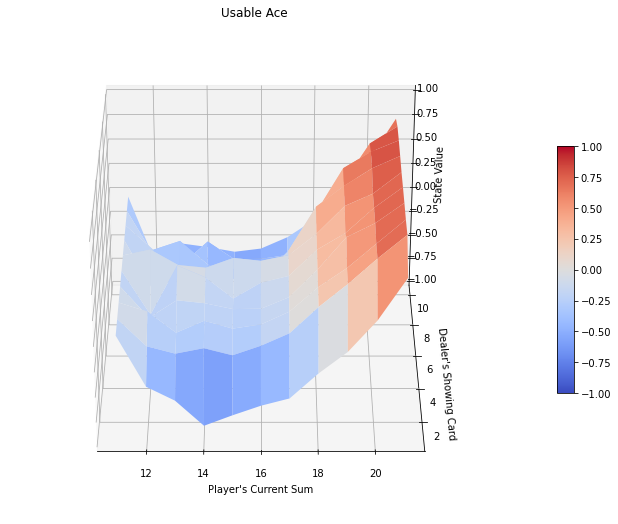

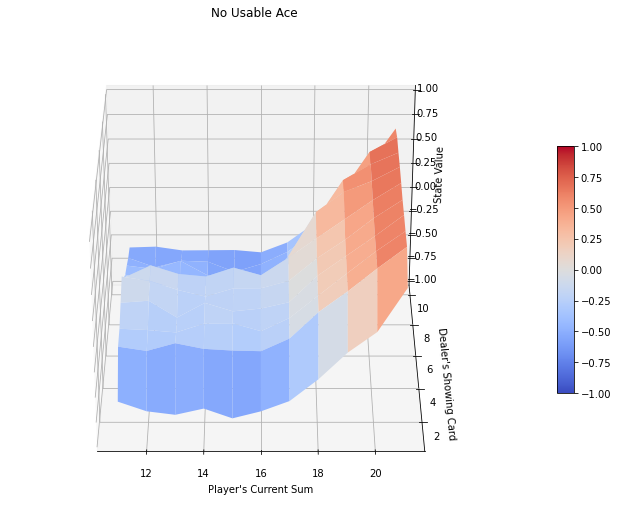

In [6]:
plot_blackjack_values(V_from_Q, angle=-90)